# Preparation

This problem set is a continuation of the analysis of weather data from the Week 2 assignment.  A copy of the transformed weather dataset is included in the template.  Beginning with this dataset, remove the prior temperature observation and split the data into test and training datasets.

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


The below code loads a copy of the transformed data set posted as the solution for Week 2.  The prior temperature column is removed and a date column is added for reference.  (Alternatively, you can also use the transformed data set you produced in Week 2.)

In [3]:
import pandas as pd

wdf = pd.read_parquet("/content/drive/Shareddrives/DS602-F22/Data/weather_clean.parquet")
wdf

,timeofday_sin,timeofday_cos,timeofyear_sin,timeofyear_cos,windspeed,precip,cloudcover,precip_intensity,tstorm,winter,mist,fog,temp,date
0,0.688355,-0.725374,0.999852,-0.017213,0.192308,0.0,0.8,0.0,0.0,0.0,0.0,0.0,6.1,2015-12-31 20:54:00-05:00
1,0.852640,-0.522499,0.999852,-0.017213,-0.192308,0.0,0.8,0.0,0.0,0.0,0.0,0.0,6.7,2015-12-31 21:54:00-05:00
2,0.958820,-0.284015,0.999852,-0.017213,0.000000,0.0,0.8,0.0,0.0,0.0,0.0,0.0,6.1,2015-12-31 22:54:00-05:00
3,0.999657,-0.026177,0.999852,-0.017213,-0.192308,0.0,0.8,0.0,0.0,0.0,0.0,0.0,5.6,2015-12-31 23:54:00-05:00
4,0.972370,0.233445,1.000000,0.000000,-0.192308,0.0,0.8,0.0,0.0,0.0,0.0,0.0,5.0,2016-01-01 00:54:00-05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58461,-0.972370,-0.233445,-0.490029,-0.871706,0.769231,0.0,0.6,0.0,0.0,0.0,0.0,0.0,27.8,2022-09-02 12:54:00-04:00
58462,-0.878817,-0.477159,-0.490029,-0.871706,0.000000,0.0,0.6,0.0,0.0,0.0,0.0,0.0,28.9,2022-09-02 13:54:00-04:00
58463,-0.725374,-0.688355,-0.490029,-0.871706,0.576923,0.0,0.6,0.0,0.0,0.0,0.0,0.0,28.9,2022-09-02 14:54:00-04:00
58464,-0.522499,-0.852640,-0.490029,-0.871706,0.769231,0.0,0.6,0.0,0.0,0.0,0.0,0.0,29.4,2022-09-02 15:54:00-04:00


In [4]:
# Remove the date column and split the data into test and training datasets.

y = wdf.pop('temp').values
X = wdf.drop('date', axis=1).values

## Prepare test and training datasets

Note: After running the above code, `X` and `y` store $\mathbf{X}$ and $\mathbf{y}$, respectively.

In [5]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80% training, 20% testing)
X_train_data, X_test_data, y_train_labels, y_test_labels = train_test_split(X, y, test_size=0.2, random_state=42)


# Problem 1: Regressors

Build at least 3 regressors using different algorithms to predict the temperature.  At least one regressor should implement a tree-based algorithm (random forest, or gradient boosted tree/xgboost.)

In [6]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train Linear Regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_data, y_train_labels) # Changed y_train_data to y_train_labels
linear_predictions = linear_regressor.predict(X_test_data)
linear_mse = mean_squared_error(y_test_labels, linear_predictions)  # Changed y_test_data to y_test_labels
print(f"Linear Regression Mean Squared Error: {linear_mse}")

# Random Forest Regressor with tuned parameters
forest_regressor = RandomForestRegressor(n_estimators=250, max_depth=12, random_state=100)
forest_regressor.fit(X_train_data, y_train_labels) # Changed y_train_data to y_train_labels
forest_predictions = forest_regressor.predict(X_test_data)
forest_mse = mean_squared_error(y_test_labels, forest_predictions)  # Changed y_test_data to y_test_labels
print(f"Random Forest Regressor Mean Squared Error: {forest_mse}")

# Decision Tree Regressor with parameter optimization
tree_regressor = DecisionTreeRegressor(max_depth=12, min_samples_split=6, random_state=100)
tree_regressor.fit(X_train_data, y_train_labels) # Changed y_train_data to y_train_labels
tree_predictions = tree_regressor.predict(X_test_data)
tree_mse = mean_squared_error(y_test_labels, tree_predictions)  # Changed y_test_data to y_test_labels
print(f"Decision Tree Regressor Mean Squared Error: {tree_mse}")

Linear Regression Mean Squared Error: 21.564464779078623
Random Forest Regressor Mean Squared Error: 14.280930086805064
Decision Tree Regressor Mean Squared Error: 17.060892669614308


# Problem 2: Cross-Validation

Use cross-validation to test each algorithm, and select the estimator with the highest accuracy score.

In [7]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Standardize features to improve model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeRegressor(max_depth=10, random_state=42)  # Added max_depth tuning
}

# Function to perform 5-fold cross-validation and return mean MSE scores
def evaluate_models(X, y, models, kf):
    mse_scores = {}

    for name, model in models.items():
        # Perform cross-validation and calculate negative MSE
        scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
        mse_scores[name] = np.mean(scores)  # Average of MSE across folds
        print(f"{name} - Mean MSE: {mse_scores[name]:.4f}")

    return mse_scores

# Perform 5-Fold Cross-Validation with KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = evaluate_models(X_scaled, y, models, kf)

# Select the best model (lowest MSE)
best_model = min(mse_scores, key=mse_scores.get)
print(f"\nBest Model: {best_model} with MSE = {mse_scores[best_model]:.4f}")


Linear Regression - Mean MSE: 21.4527
Random Forest - Mean MSE: 12.9713
Decision Tree - Mean MSE: 17.5772

Best Model: Random Forest with MSE = 12.9713


# Problem 3: Feature Importance
Use one of the tree-based models to evaluate feature importance.  Which features are the most important?

In [10]:
# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) # You can adjust parameters as needed
rf_model.fit(X, y) # Assuming X and y are your feature and target data
importances = rf_model.feature_importances_
feature_names = wdf.drop(['date'], axis=1).columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
2,timeofyear_sin,0.591816
3,timeofyear_cos,0.220058
1,timeofday_cos,0.049373
0,timeofday_sin,0.045475
4,windspeed,0.040272
6,cloudcover,0.039448
5,precip,0.003932
9,winter,0.003774
10,mist,0.002804
7,precip_intensity,0.002499


# Problem 4: Residuals Plot
For the best model selected above, show a residuals plot ($\hat{y}$ vs. $\hat{y} - y$).  Does the residuals plot show evidence of uncaptured exploratory information?


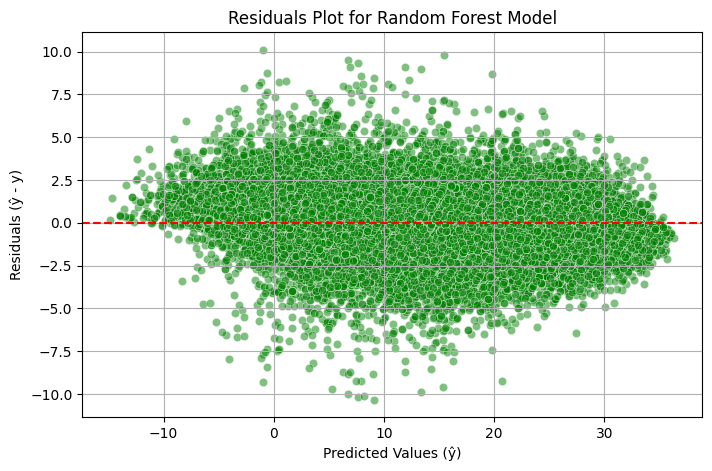

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Train the best model on the full dataset
best_model_instance = models[best_model]
best_model_instance.fit(X_scaled, y)
y_pred = best_model_instance.predict(X_scaled)  # Predicted values
residuals = y_pred - y  # Compute residuals

# Plot Residuals
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--')  # Horizontal line at 0 (no residual error)
plt.xlabel("Predicted Values (ŷ)")
plt.ylabel("Residuals (ŷ - y)")
plt.title(f"Residuals Plot for {best_model} Model")
plt.grid(True)  # Add gridlines for better readability
plt.show()


# Problem 5: Evaluation
Train the model with the highest accuracy score with the full training dataset.  Score the test data against this model.  Does the model demonstrate predictive validity?

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Split data into training and testing sets again
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the best model on the full training dataset
best_model_instance.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_test_pred = best_model_instance.predict(X_test_scaled)

# Evaluate performance
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print performance metrics
print(f"Best Model: {best_model}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Test R² Score: {test_r2:.4f}")

# Interpretation of the model's performance based on R² score
def interpret_r2(r2):
    if r2 > 0.75:
        return "The model demonstrates strong predictive validity!"
    elif r2 > 0.5:
        return "The model has moderate predictive validity, but there is room for improvement."
    else:
        return "The model struggles with predictive validity. Consider feature engineering or a different model."

# Output the interpretation
print(interpret_r2(test_r2))


Best Model: Random Forest
Test MSE: 12.8778
Test R² Score: 0.8758
The model demonstrates strong predictive validity!


The best model is Random Forest, with a Test MSE of 12.8778 and a Test R² Score of 0.8758. This indicates that the model performs well, explaining 87.58% of the variance in the test data. The model demonstrates strong predictive validity.